## yt grid visualization

In [162]:
import pyart
from matplotlib import pyplot as plt
import yt
import numpy as np
import math
import matplotlib.image as mpimg
%matplotlib inline

In [20]:
grid_data_path = '/home/rjackson/multidop_grids/cf_compliant_grid200601200050.nc'

In [122]:
pyart_grid = pyart.io.read_grid(grid_data_path)
bbox = np.array([[pyart_grid.x['data'][0], pyart_grid.x['data'][-1]],
                 [pyart_grid.y['data'][0], pyart_grid.y['data'][-1]],
                 [pyart_grid.z['data'][0], pyart_grid.z['data'][-1]]])

In [97]:
print(pyart_grid.fields.keys())

dict_keys(['eastward_wind', 'reflectivity', 'upward_air_velocity', 'northward_wind'])


## Convert Py-ART grid to yt grid

In [211]:
units = ['m/s', 'dBZ', 'm/s', 'm/s']
eastward_wind = np.ma.transpose(pyart_grid.fields['eastward_wind']['data'],
                             [2,1,0])
northward_wind = np.ma.transpose(pyart_grid.fields['northward_wind']['data'], 
                              [2,1,0])
upward_air_velocity = np.ma.transpose(pyart_grid.fields['upward_air_velocity']['data'], 
                                   [2,1,0])
reflectivity = np.ma.transpose(pyart_grid.fields['reflectivity']['data'], 
                            [2,1,0])
reflectivity[reflectivity < 0] = np.nan
data = (dict(u = (eastward_wind, 'm/s'),
             v = (northward_wind, 'm/s'),
             w = (upward_air_velocity, 'm/s'),
             dBZ = (reflectivity, 'mm**6/m**3')))
ds = yt.load_uniform_grid(data,
                          eastward_wind.shape,
                          length_unit="m",
                          time_unit="s",
                          velocity_unit="m/s",
                          bbox=bbox,
                          )

/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less
yt : [INFO     ] 2017-03-14 14:44:10,215 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-14 14:44:10,216 Parameters: domain_dimensions         = [111  81  40]
yt : [INFO     ] 2017-03-14 14:44:10,217 Parameters: domain_left_edge          = [-60000. -50000.    500.]
yt : [INFO     ] 2017-03-14 14:44:10,218 Parameters: domain_right_edge         = [ 50000.  30000.  20000.]
yt : [INFO     ] 2017-03-14 14:44:10,218 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2017-03-14 15:51:08,435 xlim = -50000.000000 30000.000000
yt : [INFO     ] 2017-03-14 15:51:08,436 ylim = 500.000000 20000.000000
yt : [INFO     ] 2017-03-14 15:51:08,438 xlim = -50000.000000 30000.000000
yt : [INFO     ] 2017-03-14 15:51:08,439 ylim = 500.000000 20000.000000
yt : [INFO     ] 2017-03-14 15:51:08,440 Making a fixed resolution buffer of (('stream', 'dBZ')) 800 by 800



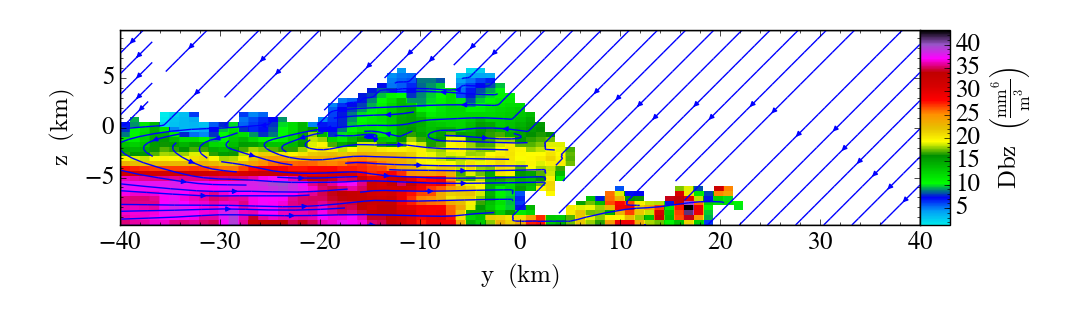

In [276]:
slc = yt.SlicePlot(ds, "x", ["dBZ"])
slc.set_cmap("dBZ", pyart.graph.cm.NWSRef)
slc.set_log("dBZ", False)
slc.annotate_grids(cmap=None)
slc.annotate_streamlines('u','w')
slc.show()

/home/rjackson/anaconda3/lib/python3.5/site-packages/yt/units/yt_array.py:1093: RuntimeWarning: invalid value encountered in less
  return super(YTArray, self).__lt__(oth)
/home/rjackson/anaconda3/lib/python3.5/site-packages/yt/units/yt_array.py:1127: RuntimeWarning: invalid value encountered in greater
  return super(YTArray, self).__gt__(oth)
yt : [INFO     ] 2017-03-14 16:02:10,642 Rendering scene (Can take a while).
yt : [INFO     ] 2017-03-14 16:02:10,644 Creating volume
yt : [INFO     ] 2017-03-14 16:02:11,340 Saving render rendering.png


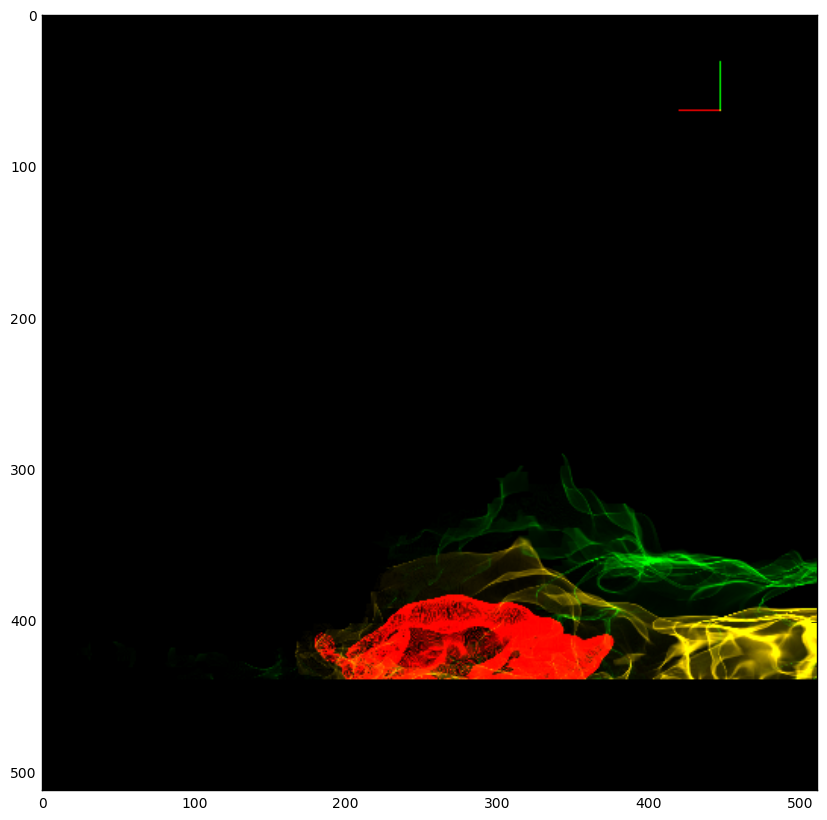

In [305]:
from yt.visualization.api import Streamlines
sc = yt.create_scene(ds, field=('stream', 'dBZ'), lens_type='perspective')

source = sc[0]

source.set_field("dBZ")
source.set_log(False)

bounds = (0, 60)

camera = sc.add_camera()
camera.set_focus((0,0,0.2))
camera.set_position((0,0,10))
camera.pitch(-math.pi/2)

# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(bounds)
sc.camera.width = (60000, 'm')
sc.camera.switch_orientation()
tf.add_layers(5, colormap=pyart.graph.cm.NWSRef)

source.tfh.tf = tf
source.tfh.bounds = bounds
source.tfh.plot('transfer_function.png', profile_field='dBZ')

# Add streamlines
c = ds.domain_center
N = 100
scale = ds.domain_width[0]
pos_dx = np.random.random((N,3))*scale-scale/2.
pos = c+pos_dx
sc.annotate_axes(alpha=0.02)

# Create streamlines of the 3D vector velocity and integrate them through
# the box defined above

sc.save('rendering.png', sigma_clip=0.1)
plt.figure(figsize=(10,10))
img = mpimg.imread('rendering.png')
plt.imshow(img)

yt : [INFO     ] 2017-03-14 15:59:40,401 Rendering scene (Can take a while).
yt : [INFO     ] 2017-03-14 15:59:40,404 Creating volume
yt : [INFO     ] 2017-03-14 15:59:41,016 Saving render rendering.png


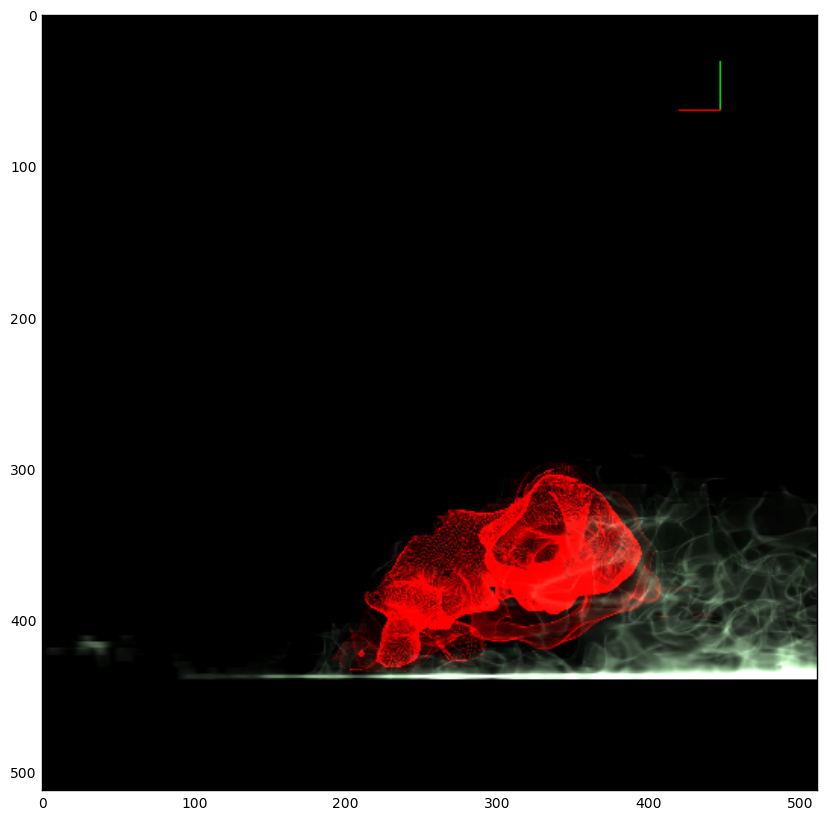

In [302]:
from yt.visualization.api import Streamlines
sc = yt.create_scene(ds, field=('stream', 'dBZ'), lens_type='perspective')

source = sc[0]

source.set_field("w")
source.set_log(False)

bounds = (-5, 5)

camera = sc.add_camera()

camera.set_focus((0,0,0.2))
camera.set_position((0,0,10))
camera.pitch(-math.pi/2)
#camera.roll(-math.pi/4)
#camera.yaw(-math.pi/4)
# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(bounds)
sc.camera.width = (60000, 'm')
tf.add_layers(5, colormap=pyart.graph.cm.NWSVel)

source.tfh.tf = tf
source.tfh.bounds = bounds
source.tfh.plot('transfer_function.png', profile_field='dBZ')

# Add streamlines
c = ds.domain_center
N = 100
scale = ds.domain_width[0]
pos_dx = np.random.random((N,3))*scale-scale/2.
pos = c+pos_dx
sc.annotate_axes()
# Create streamlines of the 3D vector velocity and integrate them through
# the box defined above

sc.save('rendering.png', sigma_clip=0.1)
plt.figure(figsize=(10,10))
img = mpimg.imread('rendering.png')
plt.imshow(img)